# Homework 1

## Введение в OpenAI Gym

 <a href=https://gym.openai.com>OpenAI Gym</a> это набор инструментов для разработки и сравнения алгоритмов обучения с подкреплением.

OpenAI Gym предоставляет простой и универсальный API ко многим средам с разными свойствами, как простым так и сложным:
* Классические задачи управления и игрушечные примеры, которые можно найти в учебниках и на которых демонстрируется работа алгоритмов обучения с подкреплением (в основном они будут использоваться в этом курсе)
* Игры Atari (оказали огромное влияние на достижения в обучении с подкреплением в последние годы)
* 2D и 3D среды для контроля роботов в симуляции (используют проприетарный движок <a href=http://www.mujoco.org/>MuJoCo</a>)

Запустим агента со случайными действиями в среде <a href=https://gym.openai.com/envs/CartPole-v0>CartPole-v0</a>. В этой среде агент должен удержать шест, который закреплен на тележке, в вертикальном положении. Агент может прикладывать силу *+1* или *-1* к тележке в попытке удержать шест. Эпизод игры заканчивается, если шест отклоняется от вертикального положения больше, чем на *15* градусов или тележка сдвигается больше, чем на *2.4* единицы расстояния от центра. За каждый шаг времени, когда шест находится в вертикальном положении, агент получает награду в размере *+1* очко. Задаче считается "решенной" при получении агентом средней за 100 попыток награды *195* очков.

#### Для работы нам потребуется установить gym и numpy. Gym следует установить командой pip install gym=0.9.2

In [13]:
# Импортируем необходимые библиотеки
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0') # создаем среду CartPole-v0

In [9]:
env.reset()
for _ in range(1000):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # агент выбирает случайные действия
    if done:
        env.reset()

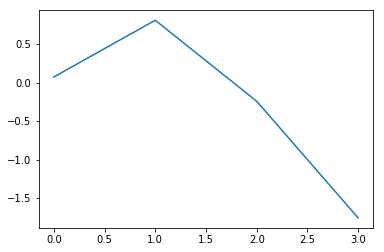

In [10]:
plt.plot(observation)

In [11]:
env.close() # выключим визуализацию

Вспомним элементы проблемы обучения с подкреплением <img src="./scheme.png" width=500>

OpenAI Gym предоставляет такой же интерфейс взаимодействия со средой:
* Среда в ответ на действие агента предоставляет *bservation (object)*- специфичный для конкретной среды объект, который предствляет наблюдения агента. Например, пиксели камеры, значения углов и скоростей сочленений робота или позиции агента и других объектов в среде.
* *reward (float)* - значение награды, полученной агентом в резултате совершенного действия
* *done (boolean)* - флаг обозначающий окончание эпизода. Например, эпизод заканчивается, когда шест слишком сильно отклонился или агент попал в прорубь в среде FrozenLake
* *info (dict)* - словарь, содержащий диагностическую информацию, которую можно использовать для отладки, но не для обучения агента. Обычно мы присваеваем значение *info* переменной по-умолчению *_*

Теперь, когда мы познакомились с API OpenAI Gym, посмотрим, сколько очков награды сможет в среднем получить за 100 эпизодов агент, выбирающий случайные действия.

In [30]:
total_reward = []
env = gym.make('CartPole-v0')
for episode in range(100):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)

Episode 1 finished after 18 timesteps
Episode 2 finished after 12 timesteps
Episode 3 finished after 13 timesteps
Episode 4 finished after 20 timesteps
Episode 5 finished after 27 timesteps
Episode 6 finished after 12 timesteps
Episode 7 finished after 13 timesteps
Episode 8 finished after 22 timesteps
Episode 9 finished after 10 timesteps
Episode 10 finished after 13 timesteps
Episode 11 finished after 21 timesteps
Episode 12 finished after 10 timesteps
Episode 13 finished after 93 timesteps
Episode 14 finished after 20 timesteps
Episode 15 finished after 70 timesteps
Episode 16 finished after 14 timesteps
Episode 17 finished after 10 timesteps
Episode 18 finished after 22 timesteps
Episode 19 finished after 17 timesteps
Episode 20 finished after 15 timesteps
Episode 21 finished after 11 timesteps
Episode 22 finished after 83 timesteps
Episode 23 finished after 20 timesteps
Episode 24 finished after 45 timesteps
Episode 25 finished after 19 timesteps
Episode 26 finished after 28 times

In [31]:
env.close()

In [32]:
print(np.mean(total_reward))

24.21


Наш "cлучайный" агент получает в среднем 20 очков за 100 эпизодов. Не очень впечатляет.

В предыдущием эксперименте агент выбирал случайное действие. Важными объектами в OpenAI Gym являются пространства состояний и действий.

In [33]:
env = gym.make('CartPole-v0')

In [34]:
print(env.action_space.__doc__)


    {0,1,...,n-1}

    Example usage:
    self.observation_space = spaces.Discrete(2)
    


In [35]:
print(env.action_space)

Discrete(2)


In [36]:
print(env.action_space.n)

2


In [37]:
print(env.observation_space.__doc__)


    A box in R^n.
    I.e., each coordinate is bounded.

    Example usage:
    self.action_space = spaces.Box(low=-10, high=10, shape=(1,))
    


In [38]:
print(env.observation_space)

Box(4,)


In [39]:
print(env.observation_space.shape)

(4,)


In [40]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [41]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

## Value Iteration

На лекции мы рассмотрели, как мы можем выучить оптимальную политику, используя алгоритм Value Iteration, если нам известна динамика среды, а также если пространства состояний и действий не большие и дискретные.

Попробуем выучить оптимальную политику в среде <a href=https://gym.openai.com/envs/FrozenLake-v0>FrozenLake-v0</a>. Это простая среда с маленькими пространствами состояний и действий, а также с известной динамикой

Созданим среду и выведем её описание

In [145]:
env = gym.make('FrozenLake-v0')

In [146]:
print(env.env.__doc__)


    Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following

        SFFF
        FHFH
        FFFH
        HFFG

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.

    


Как видно среда представляет собой поле 4 на 4, по которому нужно добраться от начала (клетка *S*) до цели (клетка *G*). При этом среда является недетерменированный - с определенной вероятностью при совершения действия агент подскользнется и попадет не в ту клетку, в которую направлялся. Клетка *H* обозначает прорубь. Игра закначивается, когда агент попадает в клетку *G* или в клету *H*. Если агент проваливается в прорубь, то он получает награду *0*, если достигает клетки цели - *1*. 

In [147]:
from gym import spaces

In [148]:
# from gym.spaces.prng import seed

In [149]:
# prng = space.Space()
# prng.seed(10)

Посмотрим, сколько в среднем очков награды за 100 эпизодов получит наш агент, если будет выполнять случайные действия.

In [153]:
# env.seed(0)
# from gym.spaces import space
# space.pseed(10) # установим сид для воспроизводимости результатов эксперимента

In [154]:
total_reward = []
for episode in range(100):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 1 finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 2 finished after 14 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 3 finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 4 finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 5 finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (D

  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 83 finished after 12 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
Episode 84 finished after 11 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
Episode 85 finished after 9 timesteps

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode 86 finished after 2 timesteps

SFFF
FHFH
FFFH
HFF

In [155]:
print(np.mean(total_reward))

0.0


Как видим, только в 3 эпизодах из 100 агену удалось добраться до цели.

In [156]:
env.reset()
for _ in range(100):
    env.render()
    action = env.action_space.sample() # take a random action
    observation, reward, done, _ = env.step(action)
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


Из среды OpenAI Gym мы можем получить элементы MDP (Markov Decision Process)

В env.env.P хранится двухуровневый словарь, в котором первый ключ является состояние, а второй - действием.
Клетки ассоциированыс индексами [0, 1, 2, ..., 15] слева направо и сверху вниз.

In [157]:
print(np.arange(16).reshape(4,4))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Индексы действией [0, 1, 2, 3] соответствуют движению на Запад, Юг, Восток и Север.
env.env.P[state][action] возвращает лист кортежей (probability, nextstate, reward). Например, состояние 0 - это начальное состояние и информация о веротностях перехода для s=0 и a=0 содержит:

In [158]:
env.env.P[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False)]

Другой пример - состояние 5 сооветсвует проруби, и все действия в данном состоянии приводят к тому же состоянию с вероятностью 1 и наградой 0

In [159]:
for i in range(4):
    print("P[5][%i] =" % i, env.env.P[5][i])

P[5][0] = [(1.0, 5, 0, True)]
P[5][1] = [(1.0, 5, 0, True)]
P[5][2] = [(1.0, 5, 0, True)]
P[5][3] = [(1.0, 5, 0, True)]


Вспомним, что из себя представляет алгоритм Value Iteration <img src="./value_iteration.png" width="500">

Задание считается решенным, если агент доходит до цели в среднем в 70% эпизодов.

In [160]:
n_states = env.env.nS
n_actions = env.env.nA
print("Number of states: {}".format(n_states))
print("Number of actions: {}".format(n_actions))

Number of states: 16
Number of actions: 4


Напишем несклько вспомогательных функций.

Поскольку алгоритм Value Iteration возвращает нам оптимальную V-функцию, то нам необходимо извлекать из нее оптимальную политику (как указано в последней строке псевдокода алгоритма)

In [161]:
def extract_policy(v, gamma = 1.0):
    policy = np.zeros(n_states)
    for state in range(n_states):
        q = np.zeros(n_actions)
        for action in range(n_actions):
            for next_sr in env.env.P[state][action]:
                probability, next_state, reward, _ = next_sr
                q[action] += (probability*(reward + gamma*v[next_state]))
        policy[state] = np.argmax(q)
    return policy

def one_step_lookahead(env, state, V , discount_factor = 0.99):
    extract_policy(V, gamma = discount_factor)

Также напишем функцию для оценки нашей найденной политики.

In [162]:
def evaluate_policy(env, policy, gamma=1.0, n=100):
    total_reward = []
    for episode in range(n):
        episode_reward = 0
        observation = env.reset()
        step = 0
        for _ in range(100):
            env.render()
            action = int(policy[observation])
            observation, reward, done, _ = env.step(action)
            episode_reward += gamma**step*reward
            step += 1
            if done:
                break
        total_reward.append(episode_reward)
    return np.mean(total_reward)

def update_policy(env, policy, V, discount_factor):
    evaluate_policy(env, policy, gamma = discount_factor)

Нам остается написать основную функцию, которая вернет оптимальную V-функцию.

In [163]:
# def value_iteration(env, gamma=1.0, max_iterations = 100000):
#     v = np.zeros(n_states)
#     eps = 1e-20
#     # Your code goes here
# #     V = np.random
#     return v
import sys

def value_iteration(env, gamma = 1.0, max_iterations = 100000):
    v = np.zeros(n_states)
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = v.copy()
        for s in range(n_states):
            q_sa = [np.sum([p*(r + gamma * prev_v[s_]) for p, s_, r, _ in env.env.P[s][a]]) 
                    for a in range(env.action_space.n)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            sys.stdout.write('Converged at iteration# %d.'%(i+1))
            break
    return v

Теперь мы можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [164]:
optimal_v = value_iteration(env)
optimal_policy = extract_policy(optimal_v)
optimal_policy_score = evaluate_policy(env, optimal_policy, n=100)

Converged at iteration# 1373.
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH


  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFF

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFF

  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SF

In [165]:
print(optimal_v.reshape(4,4))

[[0.82352941 0.82352941 0.82352941 0.82352941]
 [0.82352941 0.         0.52941176 0.        ]
 [0.82352941 0.82352941 0.76470588 0.        ]
 [0.         0.88235294 0.94117647 0.        ]]


In [166]:
# print(optimal_policy.reshape(4,4))
optimal_policy

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [167]:
optimal_policy_score

0.72

По сравнению со "случайным" агентом, который доходил до цели в 3 случаях из 100, наша новая политика позволяет добирться до цели в ~70% эпизодов.

## Policy Iteration

Вспомним, что из себя представляет алгоритм Policy Iteration <img src="policy_iteration.png" width="500">

Напишем необходимые вспомогательные функции.

Начнем с основного цикла алгоритма, который вернет нам оптимальную политику.

In [113]:
def policy_iteration(env, gamma=1.0, max_iterations = 200000):
    policy = np.random.choice(n_actions, size=(n_states))  # initialize a random policy
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

А также еще раз напишем функцию для оценки найденной политики.

In [114]:
def evaluate_policy(env, policy, gamma=1.0, n=100):
    total_reward = []
    for episode in range(n):
        episode_reward = 0
        observation = env.reset()
        step = 0
        for _ in range(100):
            env.render()
            action = int(policy[observation])
            observation, reward, done, _ = env.step(action)
            episode_reward += gamma**step*reward
            step += 1
            if done:
                break
        total_reward.append(episode_reward)
    return np.mean(total_reward)

Остается написать 2 функции, которые используются в основном цикле алгоритма Policy Iteration согласно псевдокоду.

In [115]:
# def compute_policy_v(env, policy, gamma=1.0):
#     v = np.zeros(n_states)
#     eps = 1e-10
#     # Your code goes here
#     return v

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(n_states)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(n_states):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

In [126]:
# def extract_policy(v, gamma=1.0):
#     policy = np.zeros(n_states)
#     # Your code goes here
#     return policy

def extract_policy(v, gamma = 1.0):

    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

Теперь мы также можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [127]:
optimal_policy = policy_iteration(env)
optimal_policy_score = evaluate_policy(env, optimal_policy)

Policy-Iteration converged at step 4.

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Le

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
F

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (L

In [128]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [129]:
print(optimal_policy_score)

0.83


## Дополнительное задание

Сравнить поведение случайного агента с обученным вышеприведенными методами агентом в средах из OpenAI Gym с известной динамикой <a href="https://gym.openai.com/envs/Taxi-v2/">Taxi-v2</a> и CliffWalking. Посмотрите как ведет себя агент при использовании разных значений фактора дисконтирования. 

Ко всем средам OpenAi Gym можно получить доступ не только через *gym.make* но и через обычный импорт модулей. Среда CliffWalking ипортируется именно так. 

### 1) CliffWalking

In [27]:
from gym.envs import toy_text

In [28]:
env = toy_text.CliffWalkingEnv()

In [29]:
print(env.__doc__)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 132) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/the-book-2nd.html
    
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward 
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


In [30]:
env = toy_text.CliffWalkingEnv()
env.seed(0)
print(env.__doc__)

random_agent = RandomAgent(env)
print('Random agent score is', random_agent.score(close = False))


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 132) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/the-book-2nd.html
    
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward 
    and a reset to the start. An episode terminates when the agent reaches the goal.
    
Random agent score is -1109.04


In [31]:
score_value_and_policy_iteration_agents(env, show_policy = True, gamma = 1.00)

Value iteration agent score is -13.0


HBox(children=(IntProgress(value=0, description='policy_iteration: ', max=30), HTML(value='')))

Policy-Iteration converged at step 15.
Policy iteration agent score is -13.0


(-13.0, -13.0)

In [ ]:
for gamma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]:
    temp_agent, temp_policy = score_value_and_policy_iteration_agents

In [ ]:
setattr(env, 'env', env)
n_states = env.env.nS

optimal_policy = policy_iteration(env)
optimal_policy_score = evaluate_policy(env, optimal_policy)

In [ ]:
print(optimal_policy_score)

Трек 2

In [ ]:
env = toy_text.Taxi-v2()